### Mouse pose classification

In [26]:
import os
import pandas as pd
import numpy as np
from platform import python_version
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline

In [5]:
print("current python version:", python_version())

current python version: 3.7.9


In [6]:
data = pd.read_csv("../data_all/mouse_body_pos.csv")
data.head()

,img_no,ear_r_x,ear_r_y,ear_l_x,ear_l_y,eye_r_x,eye_r_y,eye_l_x,eye_l_y,nose_x,nose_y
0,img_0001.jpg,265.0,85.0,382.0,95.0,280.0,198.0,342.0,199.0,296.0,276.0
1,img_0002.jpg,248.0,7.0,286.0,24.0,NaN,NaN,206.0,42.0,124.0,41.0
2,img_0003.jpg,265.0,85.0,381.0,96.0,276.0,197.0,338.0,199.0,291.0,276.0
3,img_0004.jpg,156.0,49.0,NaN,NaN,215.0,73.0,NaN,NaN,279.0,83.0
4,img_0005.jpg,170.0,99.0,230.0,99.0,192.0,143.0,234.0,147.0,227.0,183.0


In [39]:
fr_num = 946

data_path = '../data_all/mouse_pos'
img_path = os.path.join(data_path,"img_0"+str(fr_num)+'.jpg')
print(img_path)

../data_all/mouse_pos/img_0946.jpg


In [28]:
single_df=data.iloc[[fr_num-1]]
single_df

,img_no,ear_r_x,ear_r_y,ear_l_x,ear_l_y,eye_r_x,eye_r_y,eye_l_x,eye_l_y,nose_x,nose_y
945,img_0946.jpg,210.0,97.0,334.0,119.0,215.0,150.0,286.0,158.0,222.0,183.0


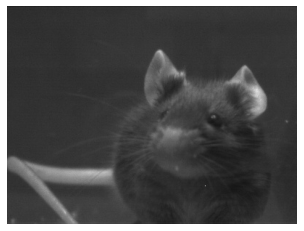

In [162]:
img=cv2.imread(img_path) 
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

(-0.5, 399.5, 299.5, -0.5)

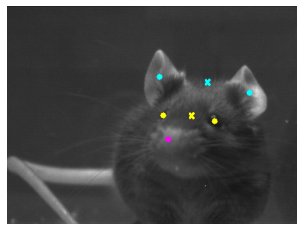

In [177]:
# Retrieve the coordinates of the body parts

ear_rx, ear_ry = int(single_df[['ear_r_x']].squeeze()), int(single_df[['ear_r_y']].squeeze())
ear_lx, ear_ly = int(single_df[['ear_l_x']].squeeze()), int(single_df[['ear_l_y']].squeeze())
eye_rx, eye_ry = int(single_df[['eye_r_x']].squeeze()), int(single_df[['eye_r_y']].squeeze())
eye_lx, eye_ly = int(single_df[['eye_l_x']].squeeze()), int(single_df[['eye_l_y']].squeeze())
n_x, n_y = int(single_df[['nose_x']].squeeze()), int(single_df[['nose_y']].squeeze())

# calculate the centers
ear_cx, ear_cy = int((ear_rx+ear_lx)/2), int((ear_ry+ear_ly)/2)
eye_cx, eye_cy = int((eye_rx+eye_lx)/2), int((eye_ry+eye_ly)/2)

radius = 1
cyan=[0,255,255]
yellow=[255,255,0]
magenta=[255,0,255]
font=cv2.FONT_HERSHEY_SIMPLEX
font_scale=0.5

img=cv2.imread(img_path) 
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_marked=img

# plot the detected body parts
img_marked=cv2.circle(img_marked, (ear_rx, ear_ry), radius=radius, color=cyan, thickness=5)
img_marked=cv2.circle(img_marked, (ear_lx, ear_ly), radius=radius, color=cyan, thickness=5)
img_marked=cv2.circle(img_marked, (eye_rx, eye_ry), radius=radius, color=yellow, thickness=5)
img_marked=cv2.circle(img_marked, (eye_lx, eye_ly), radius=radius, color=yellow, thickness=5)
img_marked=cv2.circle(img_marked, (n_x, n_y), radius=radius, color=magenta, thickness=5)

# mark the center position
img_marked=cv2.putText(img_marked, 'x', (ear_cx, ear_cy), font, font_scale, color=cyan, thickness=2)
img_marked=cv2.putText(img_marked, 'x', (eye_cx, eye_cy), font, font_scale, color=yellow, thickness=2)

plt.imshow(img_marked)
plt.axis('off')

In [179]:
# Key features to determine the head pose 

# TO DEFINE the FRONT: 
print(ear_rx)
print(eye_rx)
if ear_rx < eye_rx & eye_rx < n_x:
    print('right side ')

210
215


True